In [1]:
import numpy as np
import torch

from data_utils import DFirt
from classifiers.plain_cnn import PlainCNN
from classifiers.shuffle_net_v2 import ShuffleNetv2
from classifiers.mobile_net_v2 import MobileNetv2
from classifiers.efficient_net_vX import EfficientNetvX
from classifiers.resnext50_32x4d import ResNext50_32x4d

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

%load_ext autoreload
%autoreload 2

In [2]:
loss_func =  torch.nn.CrossEntropyLoss()
model = torch.load('models/EfficientNetb0.model')

DFFD test set

In [3]:
from utils import evaluation_DFFD
test_history = evaluation_DFFD('../DFirt/test/', model, loss_func)

TEST acc/loss: 0.969146/0.102703


Confusion matrix: 
 [[1.3128e+04 1.0000e+00 1.8400e+02 1.0000e+00 1.1870e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2000e+01 0.0000e+00 3.5872e+04 1.0000e+00 6.2000e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]


FINISH.


/home/akrami/deepfake_detection/Experiments_DFirt/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  conf_mat_norm = (conf_mat.T/np.sum(conf_mat, axis=1)).T # normalize confusion matrix


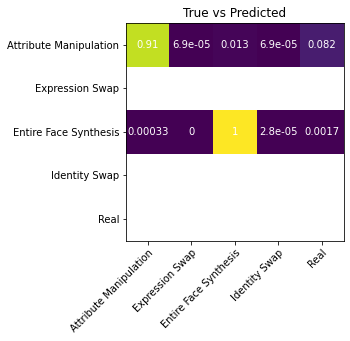

In [4]:
from utils import plt_conf_mat
plt_conf_mat(test_history[-2])

FaceForensics++ test set

In [5]:
from utils import evaluation_ffpp
submission = '../DFirt/example_submission.json'
data = '../DFirt/faceforensics_benchmark_images/'
evaluation_ffpp(data, model, submission)